In [1]:
%pylab inline
from astropy.io import fits
from astropy.table import Table
from simqso.sqrun import buildWaveGrid,load_spectra
from simqso import hiforest
import bossqsos

Populating the interactive namespace from numpy and matplotlib


### Input luminosity function

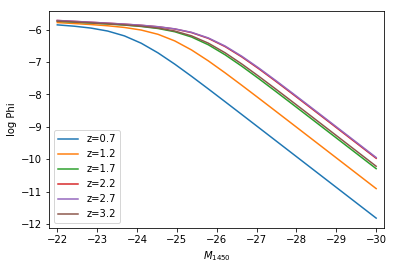

In [2]:
M1450 = linspace(-30,-22,20)
zz = arange(0.7,3.5,0.5)
ple = bossqsos.BOSS_DR9_PLE()
lede = bossqsos.BOSS_DR9_LEDE()
for z in zz:
    if z<2.2:
        qlf = ple if z<2.2 else lede
    plot(M1450,qlf(M1450,z),label='z=%.1f'%z)
legend(loc='lower left')
xlim(-21.8,-30.2)
xlabel("$M_{1450}$")
ylabel("log Phi")

### Run the simulation, save the spectra

In [2]:
bossqsos.qsoSimulation(bossqsos.simParams,saveSpectra=True)

boss_dr9qlf_sim output not found
generating Mz grid
integration returned  417  objects
loading forest  boss_dr9qlf_forest
... not found, generating forest
finished LOS #20
finished LOS #40
finished LOS #60
finished LOS #80
finished LOS #100
finished LOS #120
finished LOS #140
finished LOS #160
finished LOS #200
done!
... building continuum grid
using Fe scales:  [(0, 1540, 0.5), (1540, 1680, 2.0), (1680, 1868, 1.6), (1868, 2140, 1.0), (2140, 3500, 1.0)]
units are  flux
fluxBand is  2 ['SDSS-Legacy-u', 'SDSS-Legacy-g', 'SDSS-Legacy-r', 'SDSS-Legacy-i', 'SDSS-Legacy-z', 'UKIRT-UKIDSS_LAS-Y', 'UKIRT-UKIDSS_LAS-J', 'UKIRT-UKIDSS_LAS-H', 'UKIRT-UKIDSS_LAS-K']
buildQSOspectra iteration  1  out of  5
--> delta mag mean = -0.1159386, rms = 0.0935201, |max| = 0.3738102
buildQSOspectra iteration  2  out of  5
--> delta mag mean = -0.0182318, rms = 0.0173235, |max| = 0.0839831
buildQSOspectra iteration  3  out of  5
--> delta mag mean = -0.0006554, rms = 0.0009488, |max| = 0.0066638
mapping photo

### Simulation outputs

In [3]:
wave,qsos = load_spectra('boss_dr9qlf_sim','.')

the table of simulated quasars, including redshift, luminosity, synthetic flux/mags in nine bands, and "observed" photometry with errors included.

also includes details of the model inputs for each quasar: `slopes` is the set of broken power law slopes defining the continuum, `emLines` is the set of Gaussian parameters for each emission line (wave, EW, sigma) measured in the rest frame.

In [4]:
qsos[::40]

appMag,z,absMag,slopes [5],"emLines [62,3]",synMag [9],synFlux [9],obsFlux [9],obsMagErr [9],obsMag [9],obsFluxErr [9],spec [2304]
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
21.0878126666,2.31264008827,-23.5864406305,-1.30013462875 .. -1.17103810612,1033.71554253 .. 276.188414122,21.7385381142 .. 20.1242162263,2.01643744822 .. 8.91894548662,1.65821975567 .. 8.60537866147,0.131667253071 .. 0.178998950236,21.7795310907 .. 20.1630750368,0.269547612271 .. 1.41876554001,1.29725353649e-17 .. 2.77570618496e-19
21.1160639387,3.85659612369,-24.4843700023,-1.47997315108 .. -1.5289745745,1033.67853343 .. 330.616235708,36.719920216 .. 20.9419785018,2.05131291156e-06 .. 4.19960650049,0.0982761747989 .. 4.52786649748,0.136329598119 .. 0.317132582762,22.7541188518 .. 20.8602659666,0.186250480635 .. 1.32258818895,1.38278199924e-28 .. 8.23463116038e-20
19.9571799476,3.17104030315,-25.3835124774,-1.5587783804 .. -1.17156259733,1033.64588081 .. 259.982719403,21.8456086836 .. 19.0741270708,1.82707563686 .. 23.4611432729,1.83962154762 .. 22.4744931538,0.107801033833 .. 0.0668781051039,21.6935520077 .. 19.1207752343,0.234433803124 .. 1.38440776946,1.39882600554e-17 .. 4.43438107087e-19
20.9662779852,2.01177157387,-23.4855706313,-1.68749530792 .. -1.05984605599,1033.6453695 .. 305.780964218,20.684127225 .. 20.4333756484,5.32536169375 .. 6.70887562539,5.48024520024 .. 7.23173472052,0.0609052451863 .. 0.213900542336,20.6330359949 .. 20.3518937833,0.318442576107 .. 1.4247692537,2.40508062475e-17 .. 2.17883618441e-19
20.7903253142,2.15935717101,-23.8865348243,-1.26718387611 .. -0.78789151431,1034.23834455 .. 319.59067474,20.8260183891 .. 20.3797291969,4.67296624952 .. 7.04868854655,4.63215211011 .. 6.80242990159,0.0544061044445 .. 0.237357964057,20.8081443423 .. 20.4183398122,0.243684530283 .. 1.48716119746,3.6113075674e-17 .. 1.22207068079e-19
21.5101142004,3.51618069953,-24.0624681249,-1.6564504042 .. -1.31250070046,1034.19713468 .. 342.522772542,32.3167277321 .. 21.5793559262,0.000118388333479 .. 2.33484271271,0.50441751216 .. 3.6278849363,0.180726979808 .. 0.416711180168,22.4629417208 .. 21.1008662392,0.260278389186 .. 1.39244746552,0.0 .. 4.40709929228e-20
21.7774509002,2.21981934194,-22.8021679188,-1.25839634323 .. -1.29912586233,1033.70730083 .. 276.430112677,22.3367525887 .. 20.7919173192,1.16224842014 .. 4.82206513401,1.01872310576 .. 5.91639810058,0.118701359028 .. 0.3298790388,22.1279708435 .. 20.5698565276,0.196438157737 .. 1.79763813077,9.93233682734e-18 .. 2.16834245661e-19
19.7749298648,3.15806146522,-25.5546863447,-1.65555043083 .. -1.08031361421,1033.99627759 .. 258.841102051,21.3353631449 .. 20.1295571559,2.92317450348 .. 8.87517934122,2.7253918716 .. 8.80570890495,0.133171399193 .. 0.199966452817,21.3383053126 .. 20.1380891884,0.380405811351 .. 1.621853527,0.0 .. 1.7904306279e-19
20.6475615025,2.31148199273,-24.1715968597,-1.68163040934 .. -1.0456963418,1034.04061988 .. 344.406601828,21.05033592 .. 20.3261043654,3.80071786304 .. 7.40556594917,3.46975900992 .. 8.94287586835,0.0919306574199 .. 0.205503667326,21.1022284611 .. 20.1213069936,0.319409107346 .. 1.6927270769,2.39049767764e-17 .. 1.52790310098e-19


the distribution in g-band magnitude:

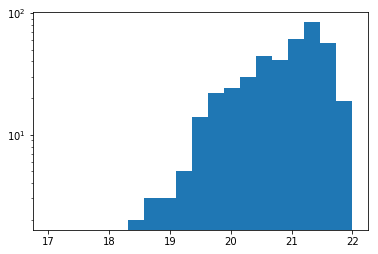

In [5]:
_ = hist(qsos['obsMag'][:,1],linspace(17,22,20),log=True)

color-color diagram from __observed__ magnitudes, including errors:

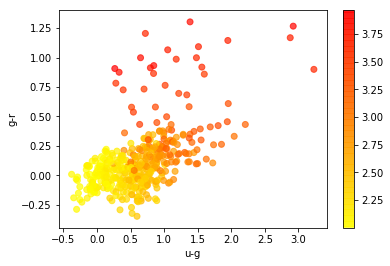

In [6]:
scatter(qsos['obsMag'][:,0]-qsos['obsMag'][:,1],qsos['obsMag'][:,1]-qsos['obsMag'][:,2],
        c=qsos['z'],cmap=cm.autumn_r,alpha=0.7)
colorbar()
xlabel('u-g')
ylabel('g-r')

the list of emission lines in the model:

In [8]:
qsodatahdr = fits.getheader('boss_dr9qlf_sim.fits',1)
for i,n in enumerate(qsodatahdr['LINENAME'].split(',')):
    print '%d:%s, '% (i,n,),
print

0:LyB,  1:ArI,  2:FeIII:UV1,  3:CIII*,  4:LyAn,  5:LyAb,  6:NV,  7:SiII,  8:OI,  9:CII,  10:SiIV+OIV],  11:L1480,  12:CIVn,  13:CIVb,  14:HeII,  15:OIII],  16:L1690,  17:NIII],  18:SiII_1818,  19:AlIII,  20:SiIII],  21:CIII]b,  22:CIII]n,  23:fe2120,  24:fe2220,  25:MgIIb,  26:MgIIn,  27:OIII_3133,  28:[NeV]3346,  29:[NeV]3426,  30:[OII]3728,  31:[NeIII]3869,  32:HeI3889,  33:[NeIII]3968,  34:Hd,  35:Hg,  36:[OIII]4364,  37:Hbeta,  38:[OIII]4960,  39:[OIII]5008,  40:HeI_5877,  41:[OI]6302,  42:[OI]6365,  43:[NII]6549,  44:[NII]6585,  45:HAb,  46:HAn,  47:[SII]6718,  48:[SII]6732,  49:HeI7067,  50:[OII]7321,  51:OI8446,  52:[SIII]9069,  53:FeII9202,  54:Pae,  55:Pad,  56:HeI10830,  57:Pag,  58:OI11287,  59:Pabeta,  60:Paalpha,  61:HeI20580, 


broad CIV equivalent width, displaying the Baldwin Effect:

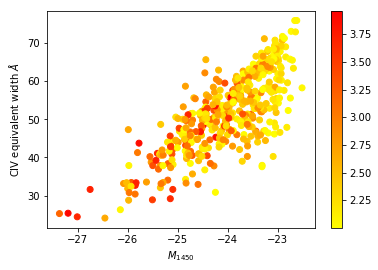

In [9]:
scatter(qsos['absMag'],qsos['emLines'][:,13,1],c=qsos['z'],cmap=cm.autumn_r)
colorbar()
xlabel("$M_{1450}$")
ylabel("CIV equivalent width $\AA$")

### Example spectra

for this example the wavelength cutoff is 30 micron, but the model doesn't include warm dust and thus is invalid beyond a few micron.

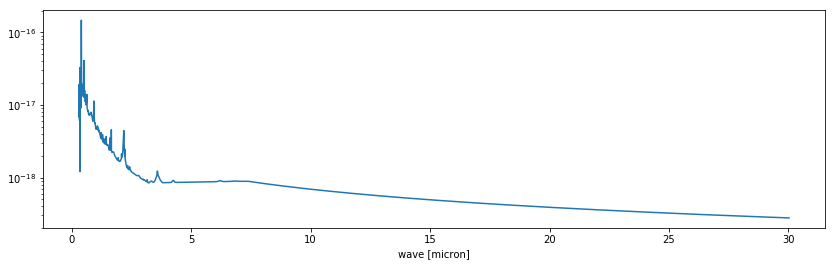

In [11]:
figure(figsize=(14,4))
plot(wave/1e4,qsos['spec'][0])
yscale('log')
xlabel('wave [micron]')

zoom in on the lyman alpha - CIV region:

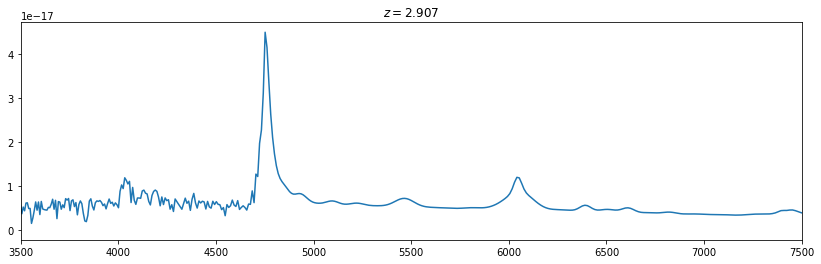

In [12]:
figure(figsize=(14,4))
plot(wave,qsos['spec'][20])
xlim(3500,7500)
title('$z=%.3f$'%qsos['z'][20])

### IGM absorption model (`simqso.hiforest`)

an example of the forest transmission spectra at R=30,000 (the native resolution for the monte carlo forest spectra):

In [13]:
wave = buildWaveGrid(dict(waveRange=(3500,4800),SpecDispersion=30000))
forest = hiforest.generate_N_spectra(wave,array([2.9]),1,fast=False)
forest

{'T': array([[  4.95667545e-95,   4.85019870e-95,   4.74599893e-95, ...,
           9.98504782e-01,   9.98508731e-01,   9.98512665e-01]]),
 'losMap': array([0]),
 'wave': array([ 3500.        ,  3500.11666861,  3500.23334111, ...,  4799.74584949,
         4799.90584368,  4800.06584321]),
 'z': array([ 2.9])}

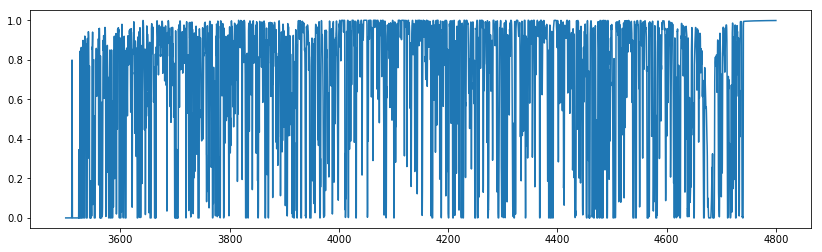

In [14]:
figure(figsize=(14,4))
plot(wave,forest['T'][0])

(4500, 4800)

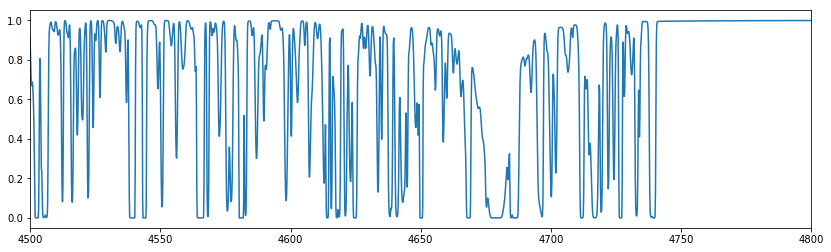

In [15]:
figure(figsize=(14,4))
plot(wave,forest['T'][0])
xlim(4500,4800)